### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [3]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [5]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [6]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

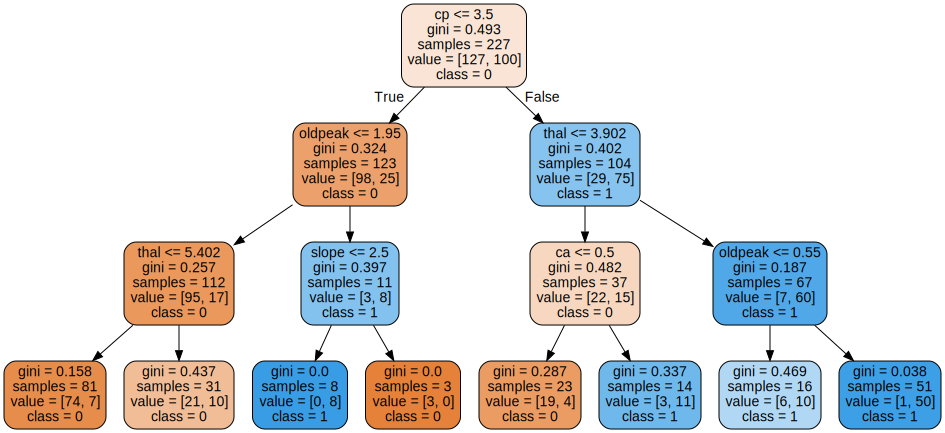

In [7]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [8]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [9]:
from sklearn.metrics import f1_score, accuracy_score

dt_clf = DecisionTreeClassifier(random_state=42)

dt_param_grid = {
    'max_depth': [3, 5, 7, 9, 12],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=5, scoring=['f1_macro', 'accuracy'], refit='f1_macro')

dt_grid_search.fit(X_train, y_train)

best_dt_model = dt_grid_search.best_estimator_
print(f"Best Decision Tree Model: {best_dt_model}")

dt_predictions = best_dt_model.predict(X_test)

best_dt_f1_macro = f1_score(y_test, dt_predictions, average='macro')
print(f"Best Decision Tree f1_macro score on test set: {best_dt_f1_macro:.4f}")

best_dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Best Decision Tree accuracy score on test set: {best_dt_accuracy:.4f}")


print("Decision Tree training and evaluation complete.")

Best Decision Tree Model: DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
Best Decision Tree f1_macro score on test set: 0.7893
Best Decision Tree accuracy score on test set: 0.7895
Decision Tree training and evaluation complete.


In [10]:
from sklearn.metrics import f1_score, accuracy_score

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

bag_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bag_grid_search = GridSearchCV(bag_clf, bag_param_grid, cv=5, scoring=['f1_macro', 'accuracy'], refit='f1_macro')

bag_grid_search.fit(X_train, y_train)

best_bag_model = bag_grid_search.best_estimator_
print(f"Best Bagged Decision Trees Model: {best_bag_model}")

bag_predictions = best_bag_model.predict(X_test)

best_bag_f1_macro = f1_score(y_test, bag_predictions, average='macro')
print(f"Best Bagged Decision Trees f1_macro score on test set: {best_bag_f1_macro:.4f}")

best_bag_accuracy = accuracy_score(y_test, bag_predictions)
print(f"Best Bagged Decision Trees accuracy score on test set: {best_bag_accuracy:.4f}")

print("Bagged Decision Trees training and evaluation complete.")

Best Bagged Decision Trees Model: BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_features=0.7, max_samples=0.5, n_estimators=100,
                  random_state=42)
Best Bagged Decision Trees f1_macro score on test set: 0.8420
Best Bagged Decision Trees accuracy score on test set: 0.8421
Bagged Decision Trees training and evaluation complete.


##จากผลการทดลอง, โมเดลที่ดีที่สุดคือ Bagged Decision Trees

In [11]:
from sklearn.metrics import f1_score, accuracy_score

rf_clf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [0.5, 0.7, 1.0, 'sqrt'],
    'max_depth': [5, 10, 15, None]
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=5, scoring=['f1_macro', 'accuracy'], refit='f1_macro', n_jobs=-1)

rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
print(f"Best Random Forest Model: {best_rf_model}")

rf_predictions = best_rf_model.predict(X_test)

best_rf_f1_macro = f1_score(y_test, rf_predictions, average='macro')
print(f"Best Random Forest f1_macro score on test set: {best_rf_f1_macro:.4f}")

best_rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Best Random Forest accuracy score on test set: {best_rf_accuracy:.4f}")


print("Random Forest training and evaluation complete.")

Best Random Forest Model: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)
Best Random Forest f1_macro score on test set: 0.8287
Best Random Forest accuracy score on test set: 0.8289
Random Forest training and evaluation complete.


In [12]:
print("\n--- Model Performance Comparison ---")
print(f"Decision Tree: F1-macro = {best_dt_f1_macro:.4f}, Accuracy = {best_dt_accuracy:.4f}")
print(f"Bagged Decision Trees: F1-macro = {best_bag_f1_macro:.4f}, Accuracy = {best_bag_accuracy:.4f}")
print(f"Random Forest: F1-macro = {best_rf_f1_macro:.4f}, Accuracy = {best_rf_accuracy:.4f}")

model_scores = {
    "Decision Tree": {"f1_macro": best_dt_f1_macro, "accuracy": best_dt_accuracy, "model": best_dt_model, "params": dt_grid_search.best_params_},
    "Bagged Decision Trees": {"f1_macro": best_bag_f1_macro, "accuracy": best_bag_accuracy, "model": best_bag_model, "params": bag_grid_search.best_params_},
    "Random Forest": {"f1_macro": best_rf_f1_macro, "accuracy": best_rf_accuracy, "model": best_rf_model, "params": rf_grid_search.best_params_}
}

best_model_name = max(model_scores, key=lambda name: model_scores[name]['f1_macro'])
best_model_info = model_scores[best_model_name]

print(f"\nBest Model based on F1-macro: {best_model_name}")
print(f"  F1-macro: {best_model_info['f1_macro']:.4f}")
print(f"  Accuracy: {best_model_info['accuracy']:.4f}")
print(f"  Best Hyperparameters: {best_model_info['params']}")


--- Model Performance Comparison ---
Decision Tree: F1-macro = 0.7893, Accuracy = 0.7895
Bagged Decision Trees: F1-macro = 0.8420, Accuracy = 0.8421
Random Forest: F1-macro = 0.8287, Accuracy = 0.8289

Best Model based on F1-macro: Bagged Decision Trees
  F1-macro: 0.8420
  Accuracy: 0.8421
  Best Hyperparameters: {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 100}



Decision Tree

สำหรับโมเดลต้นไม้ตัดสินใจ เราเลือกปรับไฮเปอร์พารามิเตอร์ดังนี้

ความลึกสูงสุดของต้นไม้ เพื่อควบคุมความซับซ้อนของโมเดล และลดปัญหา overfitting

จำนวนข้อมูลขั้นต่ำที่ต้องมีในโหนดก่อนจะแบ่งต่อ เพื่อป้องกันการสร้างกิ่งที่เล็กเกินไป

เกณฑ์ที่ใช้ในการเลือกการแบ่งโหนด เพื่อให้การแบ่งข้อมูลในแต่ละขั้นมีประสิทธิภาพ

Bagged Decision Trees

สำหรับโมเดล Bagged Decision Trees เราเลือกปรับไฮเปอร์พารามิเตอร์ดังนี้

จำนวนต้นไม้ที่นำมารวมกัน เพื่อเพิ่มความเสถียรและลดความแปรปรวนของโมเดล

สัดส่วนของข้อมูลที่สุ่มมาใช้ฝึกต้นไม้แต่ละต้น เพื่อสร้างความหลากหลายให้กับต้นไม้

ความซับซ้อนของต้นไม้แต่ละต้น เพื่อป้องกันไม่ให้ต้นไม้แต่ละต้นเรียนรู้รายละเอียดของข้อมูลมากเกินไป

Random Forest

สำหรับโมเดล Random Forest เราเลือกปรับไฮเปอร์พารามิเตอร์ดังนี้

จำนวนต้นไม้ในป่า เพื่อให้การทำนายมีความแม่นยำและเสถียรมากขึ้น

เพิ่มความแตกต่างระหว่างต้นไม้และลดความสัมพันธ์กันของต้นไม้

ความลึกสูงสุดของต้นไม้ เพื่อควบคุมความซับซ้อนของโมเดลและลดการ overfitting



--- Plotting the Best Decision Tree Model ---


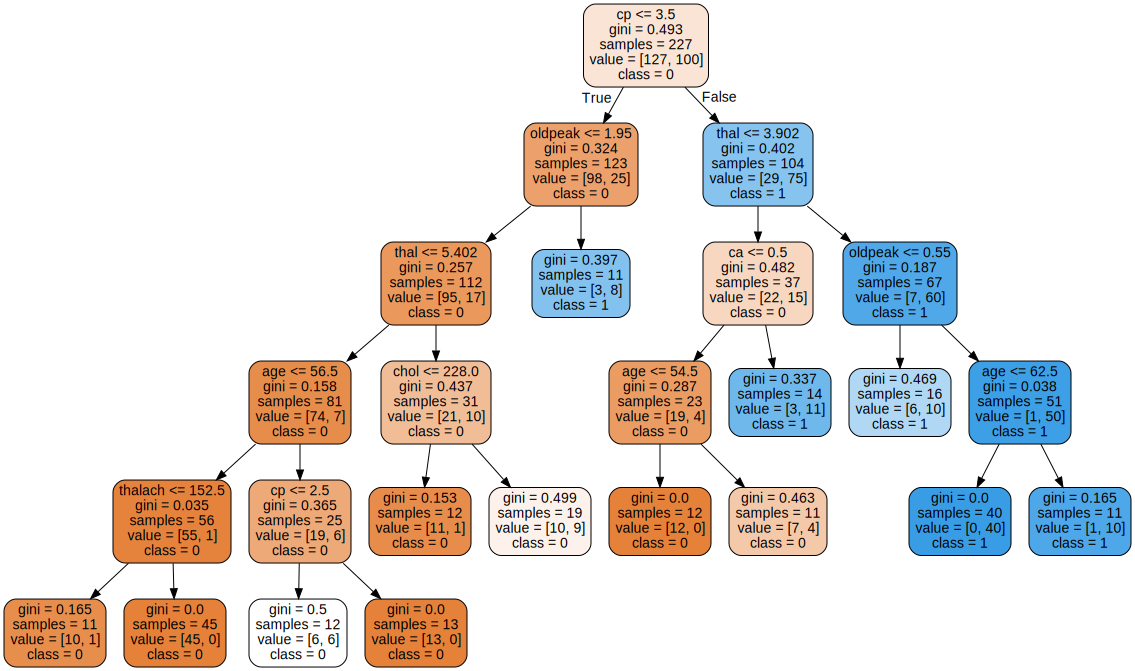

Best Decision Tree model plotted successfully.


In [13]:
print("\n--- Plotting the Best Decision Tree Model ---")

import graphviz
from sklearn.tree import export_graphviz

if 'best_dt_model' in locals() and isinstance(best_dt_model, DecisionTreeClassifier):
    plot_data_best_dt = export_graphviz(best_dt_model,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=data.columns[:-1],
                                class_names=['0', '1'])

    graph_best_dt = graphviz.Source(plot_data_best_dt)
    display(graph_best_dt)
    print("Best Decision Tree model plotted successfully.")
else:
    print("Best Decision Tree model not found or not a DecisionTreeClassifier. Cannot plot.")